# 1. Classroom data

In [46]:
import pickle
from data.class_data import loaddata
import numpy as np
from matplotlib import pyplot as plt
import cv2
from math import ceil, floor
import os
from tqdm import tqdm

%matplotlib inline

In [47]:
path = "data/class_data/train_data.pkl"
cls_data = loaddata.load_pkl(path)

In [48]:
len(cls_data)

6400

In [49]:
image = np.array(cls_data[775])
image.shape

(50, 5)

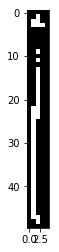

In [50]:
plt.imshow(image, cmap='gray')

In [51]:
mx = 0
mn = 50
for i in range(len(cls_data)):
    image = np.array(cls_data[i])
    mx = max(mx, max(image.shape))
    mn = min(mn, min(image.shape))
    if max(image.shape) > 50:
        print(i)
mx, mn

1843
1845
1846
1849
1850
1852
1853
1854
1855
1856
1859
1860
1861
1862
1865
1867
1868
1869
1870
1871
1872
1874
1875
1876
1878
1879
1882
1885
1887
1888
1890
1891
1892
1894
1895
1896
1897
1898
1902
1904
1905
1906
1909
1910
1911
1912
1913
1914
1915
1916
1918
1919


(54, 5)

In [52]:
labels = np.load("data/class_data/finalLabelsTrain.npy")

In [53]:
labels[59]

6.0

In [54]:
np.where(labels==1)[0][0:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89], dtype=int64)

In [55]:
classes = ['a','b','c','d','h','i','j','k']
classes[6]

'j'

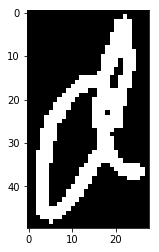

In [56]:
image = cls_data[30]
plt.imshow(image, cmap='gray')

[(0, 0), (11, 11)] [(0, 50), (0, 50)] (50, 28)
(50, 50)


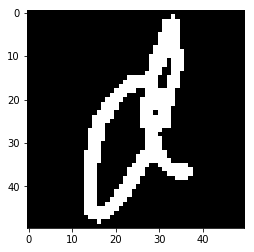

In [12]:
expected_shape = (50,50)
padding = [(0,0), (0,0)]
cropping = [(0,50), (0, 50)]
for d in [0,1]:
    exp = expected_shape[d]
    act = np.array(image).shape[d]
    diff = exp - act
    if diff > 0:
        padding[d] = (ceil(diff / 2), floor(diff / 2))
    elif diff < 0:
        diff *= -1
        cropping[d] = (ceil(diff / 2), 50 + floor(diff / 2))
print(padding, cropping, np.array(image).shape)
image = np.pad(image, padding, 'constant', constant_values=0)
y = cropping[0]
x = cropping[1]
image = image[y[0]:y[1], x[0]:x[1]]
print(image.shape)
plt.imshow(image, cmap='gray')

# 2. Our data

In [13]:
path = "data/Parth/"
file = "A/a_137.jpg"

In [14]:
a = plt.imread(path+file)
a

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

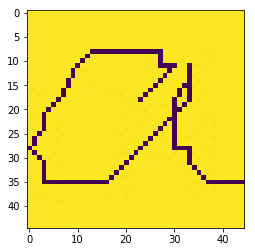

In [15]:
plt.imshow(a)

In [16]:
a.shape

(45, 45)

In [17]:
kernel = np.ones((2,2), np.uint8) 
a_dilated = cv2.erode(a, kernel, iterations=2) 

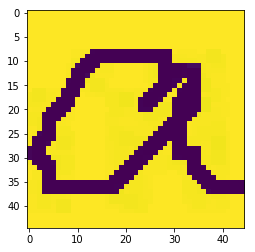

In [18]:
plt.imshow(a_dilated)

In [19]:
a_padded = cv2.copyMakeBorder(a_dilated, 2, 3, 2, 3, cv2.BORDER_CONSTANT, value=255)
a_padded.shape

(50, 50)

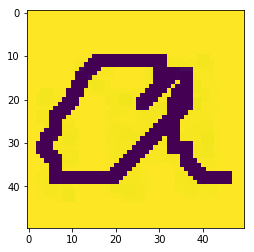

In [20]:
plt.imshow(a_padded)

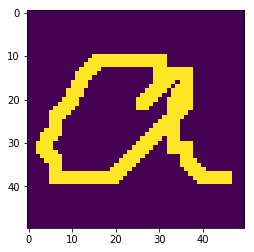

In [21]:
invert = lambda p: 0 if p>200 else 1
inverted = np.vectorize(invert)(a_padded)
plt.imshow(inverted)

In [22]:
np.max(inverted)

1

In [23]:
dest_path = "data/Parth_processed/"
plt.imsave(dest_path+"A/a_137.png", inverted)

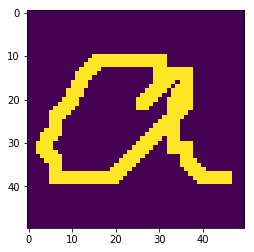

In [24]:
plt.imshow(plt.imread(dest_path+"A/a_137.png"))

In [25]:
np.max(plt.imread(dest_path+"A/a_137.png"))

1.0

In [26]:
path = "data/Parth/"
dest_path = "data/Parth_processed/"
filemap = {}
for alphabet in ["A/", "b/", "d/"]:
    x = alphabet[0].lower()
    filemap[alphabet] = list(filter(lambda f: f.startswith(x), os.listdir(path+alphabet)))
for alphabet in ["C/", "H/", "i/", "j/", "k/"]:
    filemap[alphabet] = os.listdir(path+alphabet)

In [27]:
{k:len(v) for k,v in filemap.items()}

{'A/': 2975,
 'b/': 1966,
 'd/': 1309,
 'C/': 5802,
 'H/': 1464,
 'i/': 5140,
 'j/': 1536,
 'k/': 3074}

A/ :


100%|█████████████████████████████████████████████████████████████████████| 2975/2975 [00:17<00:00, 168.33it/s]


b/ :


100%|█████████████████████████████████████████████████████████████████████| 1966/1966 [00:11<00:00, 168.55it/s]


d/ :


100%|█████████████████████████████████████████████████████████████████████| 1309/1309 [00:07<00:00, 179.11it/s]


C/ :


100%|█████████████████████████████████████████████████████████████████████| 5802/5802 [00:35<00:00, 162.22it/s]


H/ :


100%|█████████████████████████████████████████████████████████████████████| 1464/1464 [00:08<00:00, 164.37it/s]


i/ :


100%|█████████████████████████████████████████████████████████████████████| 5140/5140 [00:36<00:00, 149.22it/s]


j/ :


100%|█████████████████████████████████████████████████████████████████████| 1536/1536 [00:11<00:00, 128.78it/s]


k/ :


100%|█████████████████████████████████████████████████████████████████████| 3074/3074 [00:25<00:00, 122.19it/s]


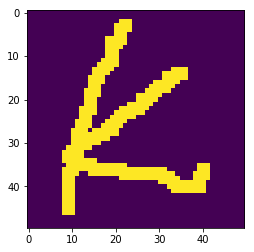

In [28]:
for alphabet, images in filemap.items():
    print(alphabet, ":")
    for image_file in tqdm(images):
        image = plt.imread(path+alphabet+image_file)
        kernel = np.ones((2,2), np.uint8) 
        image_dilated = cv2.erode(image, kernel, iterations=2) 
        image_padded = cv2.copyMakeBorder(image_dilated, 2, 3, 2, 3, cv2.BORDER_CONSTANT, value=255)
        if image_padded.shape != (50, 50):
            print("culprit")
            print(image_padded.shape)
            continue
        ret, binary = cv2.threshold(image_padded,200,255,cv2.THRESH_BINARY)
        invert = lambda p: 0 if p>200 else 255
        inverted = np.vectorize(invert)(binary)
        plt.imshow(inverted)
        name = image_file.split(".")[0]
        new_filename = name + ".png"
        success = cv2.imwrite(dest_path+alphabet+new_filename, inverted)
        if not success:
            raise Exception("not successful")

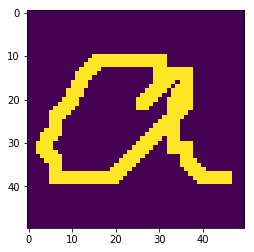

In [29]:
plt.imshow(plt.imread("data/Parth_processed/A/a_137.png"))

In [59]:
for label in os.listdir("data/Parth_processed/"):
    for image_file in os.listdir("data/Parth_processed/"+label):
        image = plt.imread("data/Parth_processed/"+label+"/"+image_file)
        if image.shape != (50,50):
            print(label+"/"+image_file)

0_other/__0_65726.png


# Our data 2: rajan's emnist derived kaggle

In [30]:
path = "data/Rajan/"

In [31]:
filemap = {}

In [32]:
for alphabet in ["A/", "B/", "D/", "H/"]:
    filemap[alphabet] = list(filter(lambda f: f.startswith("_"), os.listdir(path+alphabet)))

In [33]:
for alphabet in ["C/", "I/", "J/", "K/"]:
    filemap[alphabet] = os.listdir(path+alphabet)

In [34]:
{k:len(v) for k,v in filemap.items()}

{'A/': 10659,
 'B/': 5050,
 'D/': 11058,
 'H/': 9300,
 'C/': 13560,
 'I/': 13873,
 'J/': 4261,
 'K/': 4334}

In [35]:
alphabet = "D/"
image_file = "_1_9.jpg"
image = plt.imread(path+alphabet+image_file)

(<matplotlib.image.AxesImage at 0x1ee756f9240>, (32, 32))

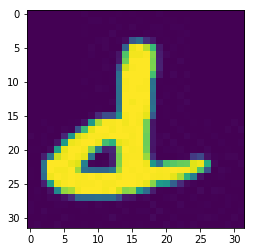

In [36]:
plt.imshow(image), image.shape

(<matplotlib.image.AxesImage at 0x1ee7574dda0>, (50, 50))

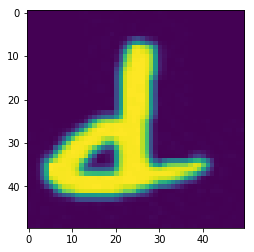

In [37]:
bigimg = cv2.resize(image,(50,50))
plt.imshow(bigimg), bigimg.shape

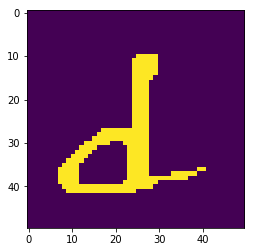

In [38]:
image = bigimg
for it in range(2):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    image = cv2.filter2D(image, -1, kernel)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    ret,image = cv2.threshold(image,200,255,cv2.THRESH_BINARY)
plt.imshow(image)

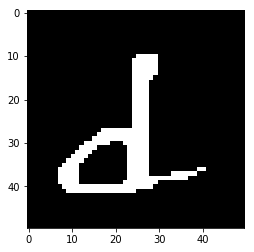

In [39]:
binarize = lambda p:1 if p==255 else 0
binary = np.vectorize(binarize)(image)
plt.imshow(binary, cmap='gray')

In [40]:
np.max(binary)

1

In [41]:
dest_path = "data/Rajan_processed/"

In [42]:
cv2.imwrite(dest_path+"test.png", binary)

True

In [ ]:
for alphabet, images in filemap.items():
    print(alphabet, ":")
    for image_file in tqdm(images):
        image = plt.imread(path+alphabet+image_file)
        bigimg = cv2.resize(image,(50,50))
        image = bigimg
        for it in range(2):
            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            image = cv2.filter2D(image, -1, kernel)
            kernel = np.ones((2,2), np.uint8)
            image = cv2.erode(image, kernel, iterations=1)
            ret,image = cv2.threshold(image,200,255,cv2.THRESH_BINARY)
        name = image_file.split(".")[0]
        new_filename = name + ".png"
#         print(dest_path+alphabet+new_filename)
        success = cv2.imwrite(dest_path+alphabet+new_filename, image)
        if not success:
            raise Exception("not successful")

In [43]:
file = os.listdir(dest_path+"A/")[0]
file

'_1_0.png'

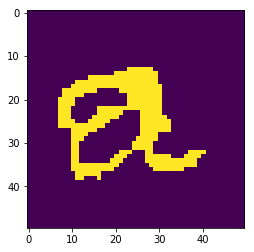

In [44]:
plt.imshow(plt.imread(dest_path+"A/_1_0.png"))

In [45]:
np.max(plt.imread(dest_path+"A/_1_0.png"))

1.0